#  More plots

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the libraries

%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import xcdat as xc
import xarray as xr
import netCDF4
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [3]:
from scipy import stats

In [4]:
import seaborn as sns

In [5]:
mpl.rcParams['font.family'] = 'Droid Sans'
mpl.rcParams['font.size'] = 12
# Edit axes parameters
mpl.rcParams['axes.linewidth'] = 1.5
# Tick properties
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.direction'] = 'out'

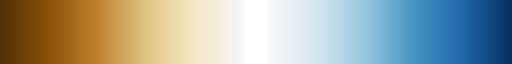

In [6]:
n = 35
diff = 0.5
cmap = plt.cm.BrBG
cmap2 = plt.cm.RdBu
lower = cmap(np.linspace(0, diff, n))
white = np.ones((2, 4))
upper = cmap2(np.linspace(1-diff, 1, n))
colors = np.vstack((lower, white, white, upper))
BrBU = mpl.colors.LinearSegmentedColormap.from_list('map_white', colors)
BrBU

In [7]:
raw = xr.open_dataset('./data/result/raw.nc')
raw

<xarray.Dataset>
Dimensions:  (time: 1380, region: 46, model: 52)
Coordinates:
  * time     (time) datetime64[ns] 1900-01-16T12:00:00 ... 2014-12-16T12:00:00
  * region   (region) int64 0 1 2 3 4 5 6 7 8 9 ... 37 38 39 40 41 42 43 44 45
  * model    (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'obs' 'rean'
Data variables:
    precip   (time, region, model) float64 ...
    nino     (time, region, model) float64 ...
    dmi      (time, region, model) float64 ...

In [8]:
out = xr.open_dataset('./data/result/out_conc.nc')

In [9]:
out['enc'] = out.nino - out.neut
out['lnc'] = out.nina - out.neut
out['asymm'] = (out.enc + out.lnc)/2
out['symm'] = (out.enc - out.lnc)/2

In [10]:
out['asymm_pval'] = xr.where((out.enc_pval > 0.05) & (out.lnc_pval > 0.05), 0, 1)

In [11]:
out

<xarray.Dataset>
Dimensions:      (model: 52, region: 46, season: 5)
Coordinates:
  * model        (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'obs' 'rean'
  * region       (region) object 'Greenland/Iceland' ... 'W.Antarctica'
  * season       (season) object 'ANN' 'DJF' 'MAM' 'JJA' 'SON'
Data variables: (12/18)
    std_dev      (model, region, season) float64 ...
    clim         (model, region, season) float64 ...
    corr_coef    (model, region, season) float64 ...
    pval         (model, region, season) float64 ...
    nino         (model, region, season) float64 ...
    nina         (model, region, season) float64 ...
    ...           ...
    threshold    (model) float64 ...
    enc          (model, region, season) float64 0.3218 0.01204 ... 0.02449
    lnc          (model, region, season) float64 -0.09092 -0.1126 ... -0.08654
    asymm        (model, region, season) float64 0.1155 -0.05029 ... -0.03103
    symm         (model, region, season) float64 0.2064 0.06233 ... 0.05551
    asymm_pval   (model, region, season) int64 0 0 0 0 0 1 1 0 ... 0 0 0 0 1 0 0

In [12]:
out.model

<xarray.DataArray 'model' (model: 52)>
array(['ACCESS-CM2', 'ACCESS-ESM1-5', 'AWI-CM-1-1-MR', 'AWI-ESM-1-1-LR',
       'BCC-CSM2-MR', 'BCC-ESM1', 'CAMS-CSM1-0', 'CAS-ESM2-0', 'CESM2',
       'CESM2-FV2', 'CESM2-WACCM', 'CESM2-WACCM-FV2', 'CMCC-CM2-HR4',
       'CMCC-CM2-SR5', 'CNRM-CM6-1', 'CNRM-CM6-1-HR', 'CNRM-ESM2-1', 'CanESM5',
       'E3SM-1-1', 'E3SM-1-1-ECA', 'EC-Earth3', 'EC-Earth3-Veg',
       'EC-Earth3-Veg-LR', 'FGOALS-f3-L', 'FGOALS-g3', 'GFDL-CM4', 'GFDL-ESM4',
       'GISS-E2-1-G', 'GISS-E2-1-G-CC', 'GISS-E2-1-H', 'HadGEM3-GC31-LL',
       'HadGEM3-GC31-MM', 'IITM-ESM', 'INM-CM4-8', 'INM-CM5-0', 'IPSL-CM6A-LR',
       'KACE-1-0-G', 'MIROC-ES2L', 'MIROC6', 'MPI-ESM-1-2-HAM',
       'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'MRI-ESM2-0', 'NESM3', 'NorCPM1',
       'NorESM2-LM', 'NorESM2-MM', 'SAM0-UNICON', 'TaiESM1', 'UKESM1-0-LL',
       'obs', 'rean'], dtype=object)
Coordinates:
  * model    (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'obs' 'rean'

In [13]:
def plot_heatmap(da, vmin, vmax, cmap, var='corr_coef', pval_var='pval', season='DJF', ascending=True, cbar_label='Corr Coef.'):
    das = da.sel(season = season)
    df_corr = das.drop('season')['corr_coef'].to_dataframe().reset_index().pivot(columns='model', index='region', values='corr_coef')
    df_corr_sorted = df_corr.sort_values('obs', ascending=ascending)
    df_var = das.drop('season')[var].to_dataframe().reset_index().pivot(columns='model', index='region', values=var)
    sns.heatmap(df_var.reindex(df_corr_sorted.index), cmap=cmap, vmin=vmin, vmax=vmax, cbar_kws={"shrink": 0.5, "pad": 0.02, "label": cbar_label, "extend":'both', })
    # plotting sign
    df_pval = das.drop('season')[pval_var].to_dataframe().reset_index().pivot(columns='model', index='region', values=pval_var)
    if pval_var == 'asymm_pval':
        zm = np.ma.masked_equal(df_pval.reindex(df_corr_sorted.index).values, 1)
    else:
        zm = np.ma.masked_less(df_pval.reindex(df_corr_sorted.index).values, 0.05)
    x, y, = np.arange(len(df_pval.columns) + 1), np.arange(len(df_pval.index) + 1)
    plt.pcolor(x, y, zm, hatch='/////', alpha=0.)

def plot_heatmap_alt(da, vmin, vmax, cmap, var='corr_coef', pval_var='pval', season='DJF', ascending=True, cbar_label='Corr Coef.'):
    das = da.sel(season = season)
    df_corr = das.drop('season')['corr_coef'].to_dataframe().reset_index().pivot(columns='model', index='region', values='corr_coef')
    df_var = das.drop('season')[var].to_dataframe().reset_index().pivot(columns='model', index='region', values=var)
    df_var_sorted = df_var.sort_values('obs', ascending=ascending)
    sns.heatmap(df_var.reindex(df_var_sorted.index), cmap=cmap, vmin=vmin, vmax=vmax, cbar_kws={"shrink": 0.5, "pad": 0.02, "label": cbar_label, "extend":'both', })
    # plotting sign
    df_pval = das.drop('season')[pval_var].to_dataframe().reset_index().pivot(columns='model', index='region', values=pval_var)
    if pval_var == 'asymm_pval':
        zm = np.ma.masked_equal(df_pval.reindex(df_var_sorted.index).values, 1)
    else:
        zm = np.ma.masked_less(df_pval.reindex(df_var_sorted.index).values, 0.05)
    x, y, = np.arange(len(df_pval.columns) + 1), np.arange(len(df_pval.index) + 1)
    plt.pcolor(x, y, zm, hatch='/////', alpha=0.)

### ANN

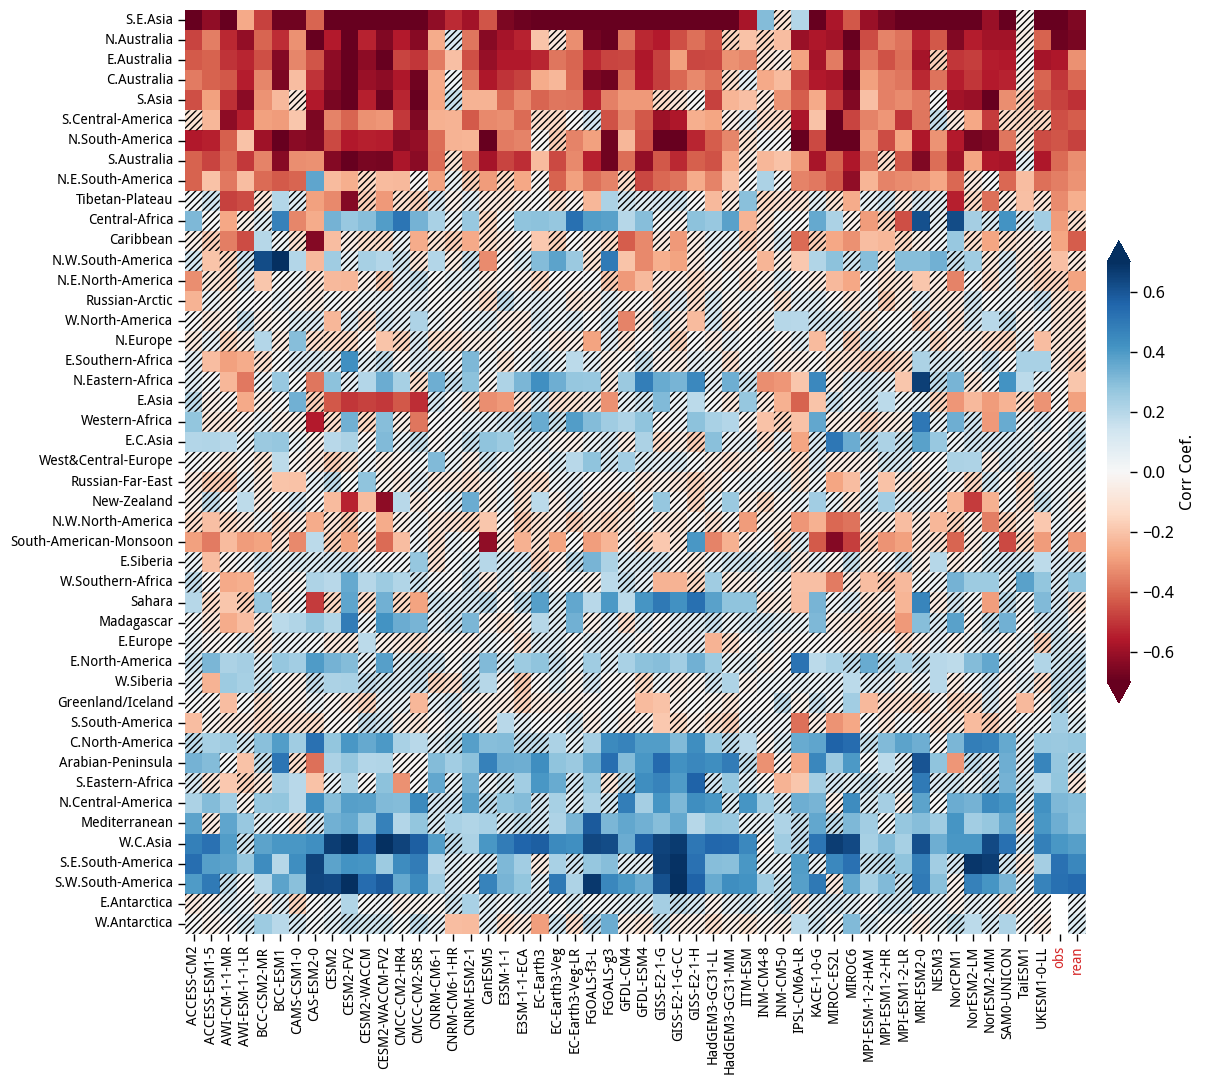

In [37]:
plt.figure(figsize=(14,12))
df = plot_heatmap(out, vmin=-0.7, vmax=0.7, cmap='RdBu', var='corr_coef', season='SON')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().get_xticklabels()[-1].set_color("tab:red")
plt.gca().get_xticklabels()[-2].set_color("tab:red")
plt.ylabel('')
plt.xlabel('')
plt.savefig('./images/model_region/son_corr.png', dpi=300, bbox_inches='tight')

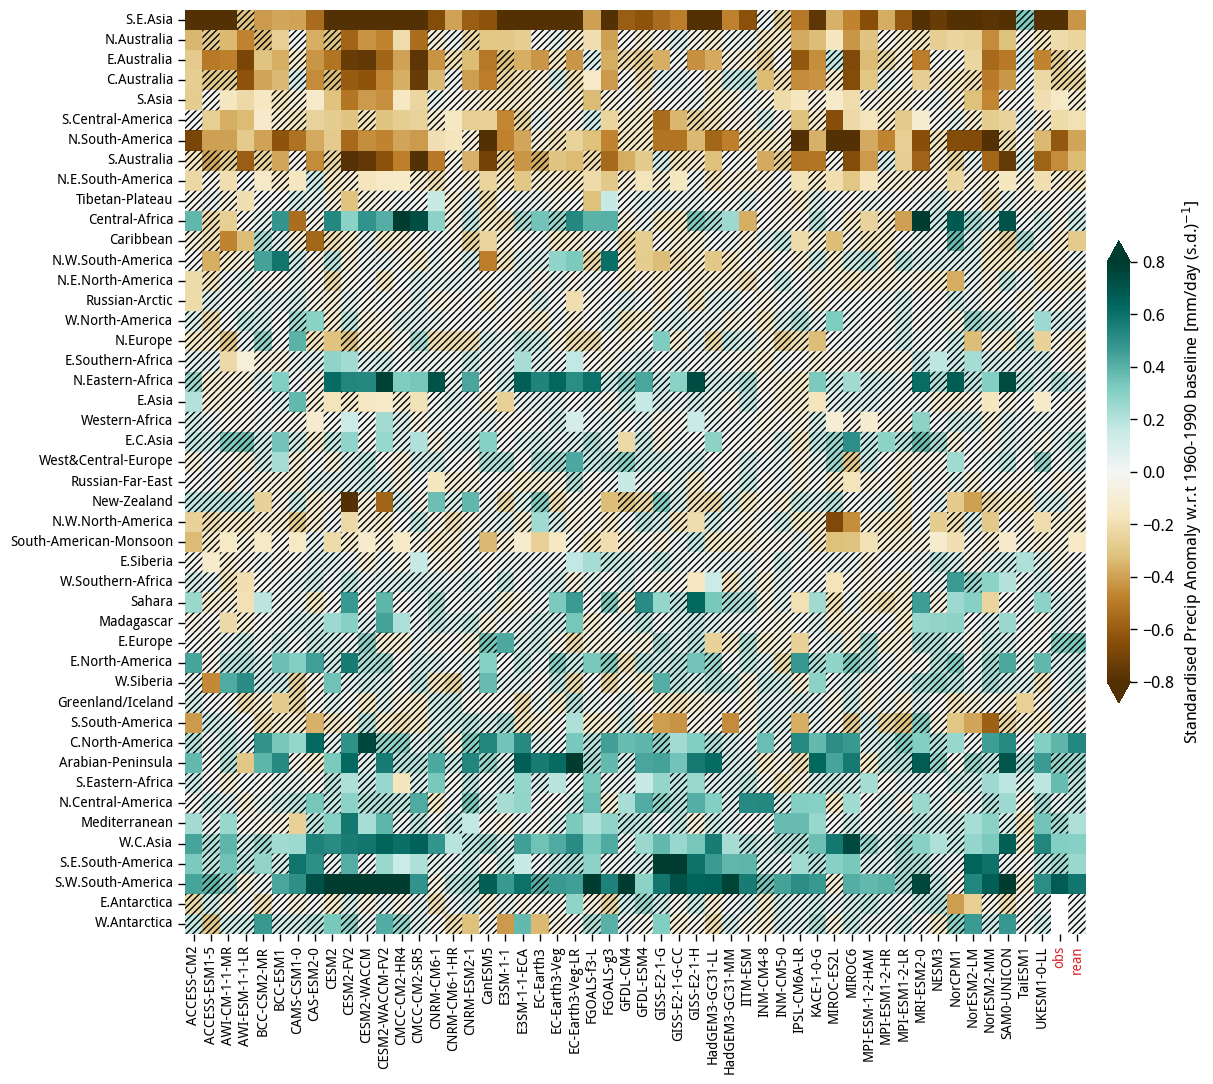

In [38]:
plt.figure(figsize=(14,12))
plot_heatmap(out, vmin=-0.8, vmax=0.8, cmap='BrBG', var='enc', pval_var='enc_pval', season='SON', cbar_label='Standardised Precip Anomaly w.r.t 1960-1990 baseline [mm/day (s.d.)$^{-1}$]')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().get_xticklabels()[-1].set_color("tab:red")
plt.gca().get_xticklabels()[-2].set_color("tab:red")
plt.ylabel('')
plt.xlabel('')
plt.savefig('./images/model_region/son_enc.png', dpi=300, bbox_inches='tight')

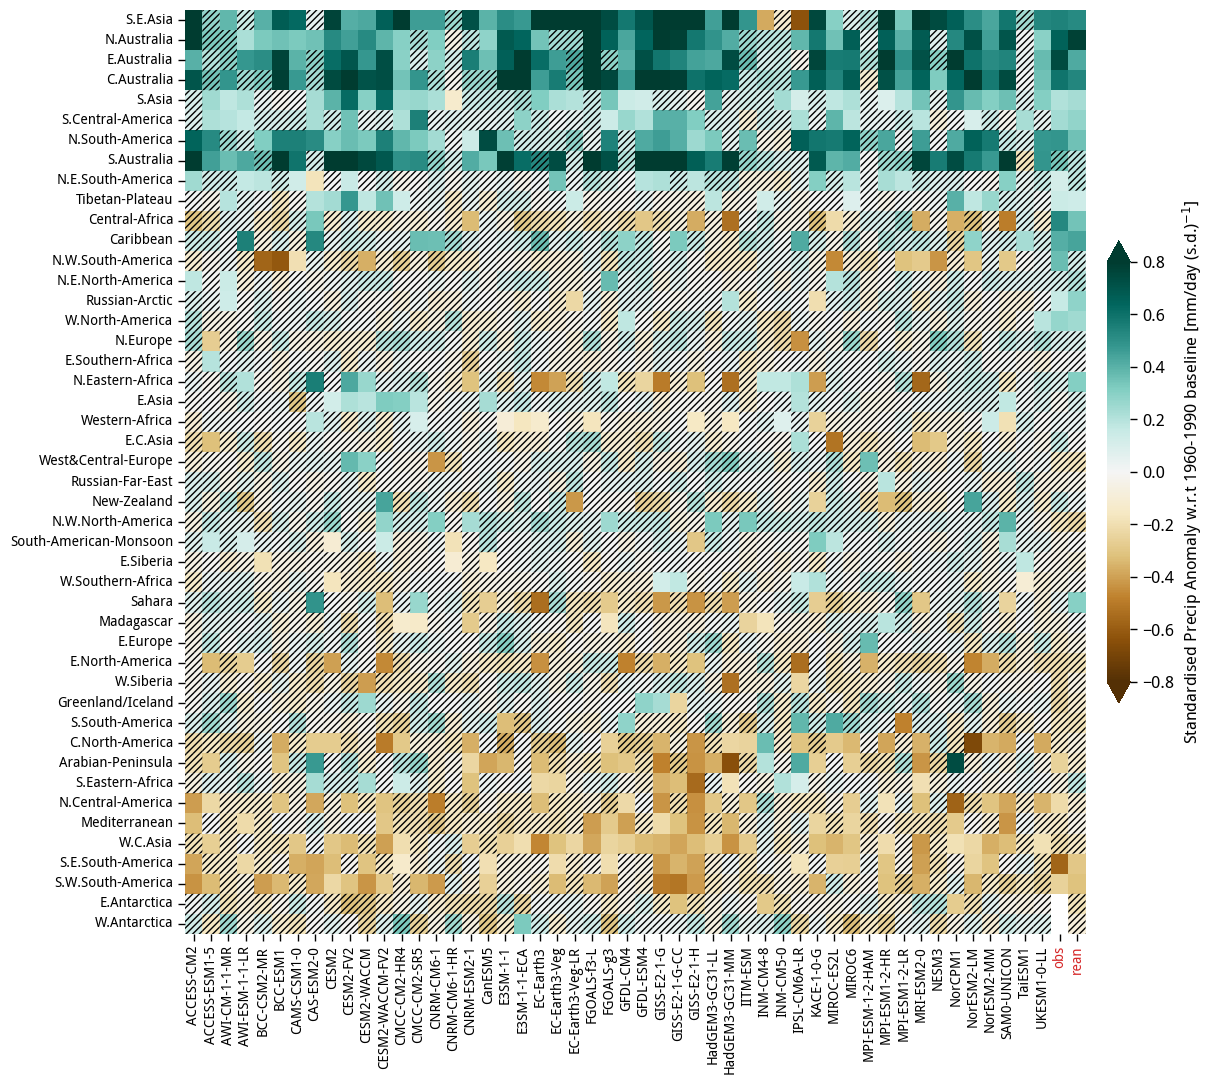

In [39]:
plt.figure(figsize=(14,12))
plot_heatmap(out, vmin=-0.8, vmax=0.8, cmap='BrBG', var='lnc', pval_var='lnc_pval', season='SON', cbar_label='Standardised Precip Anomaly w.r.t 1960-1990 baseline [mm/day (s.d.)$^{-1}$]')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().get_xticklabels()[-1].set_color("tab:red")
plt.gca().get_xticklabels()[-2].set_color("tab:red")
plt.ylabel('')
plt.xlabel('')
plt.savefig('./images/model_region/son_lnc.png', dpi=300, bbox_inches='tight')

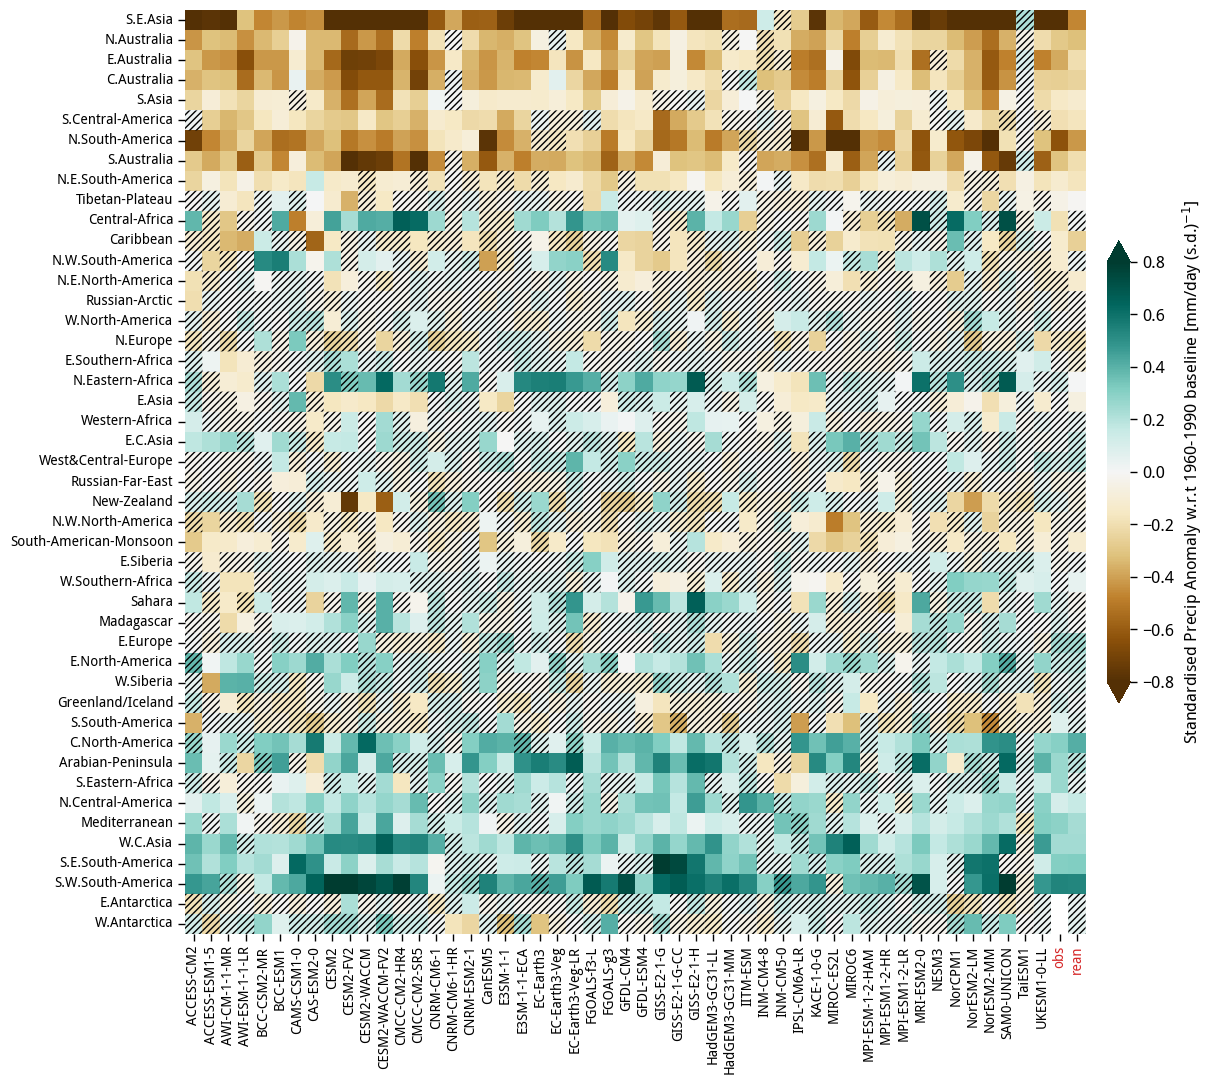

In [40]:
plt.figure(figsize=(14,12))
plot_heatmap(out, vmin=-0.8, vmax=0.8, cmap='BrBG', var='nino', season='SON', ascending=True, cbar_label='Standardised Precip Anomaly w.r.t 1960-1990 baseline [mm/day (s.d.)$^{-1}$]')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().get_xticklabels()[-1].set_color("tab:red")
plt.gca().get_xticklabels()[-2].set_color("tab:red")
plt.ylabel('')
plt.xlabel('')
plt.savefig('./images/model_region/son_nino.png', dpi=300, bbox_inches='tight')

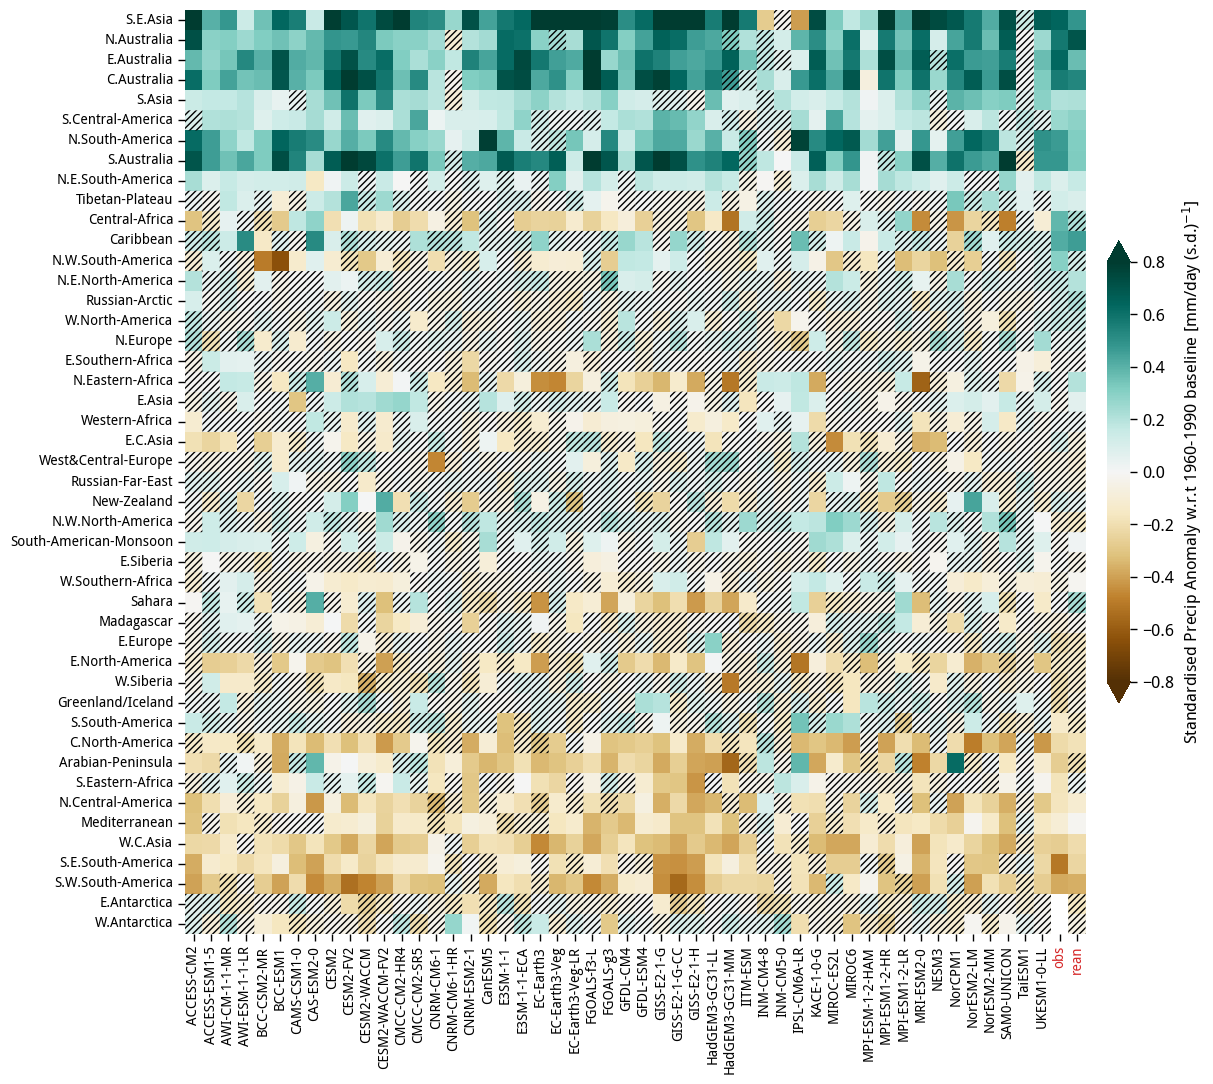

In [41]:
plt.figure(figsize=(14,12))
plot_heatmap(out, vmin=-0.8, vmax=0.8, cmap='BrBG', var='nina', season='SON', ascending=True, cbar_label='Standardised Precip Anomaly w.r.t 1960-1990 baseline [mm/day (s.d.)$^{-1}$]')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().get_xticklabels()[-1].set_color("tab:red")
plt.gca().get_xticklabels()[-2].set_color("tab:red")
plt.ylabel('')
plt.xlabel('')
plt.savefig('./images/model_region/son_nina.png', dpi=300, bbox_inches='tight')

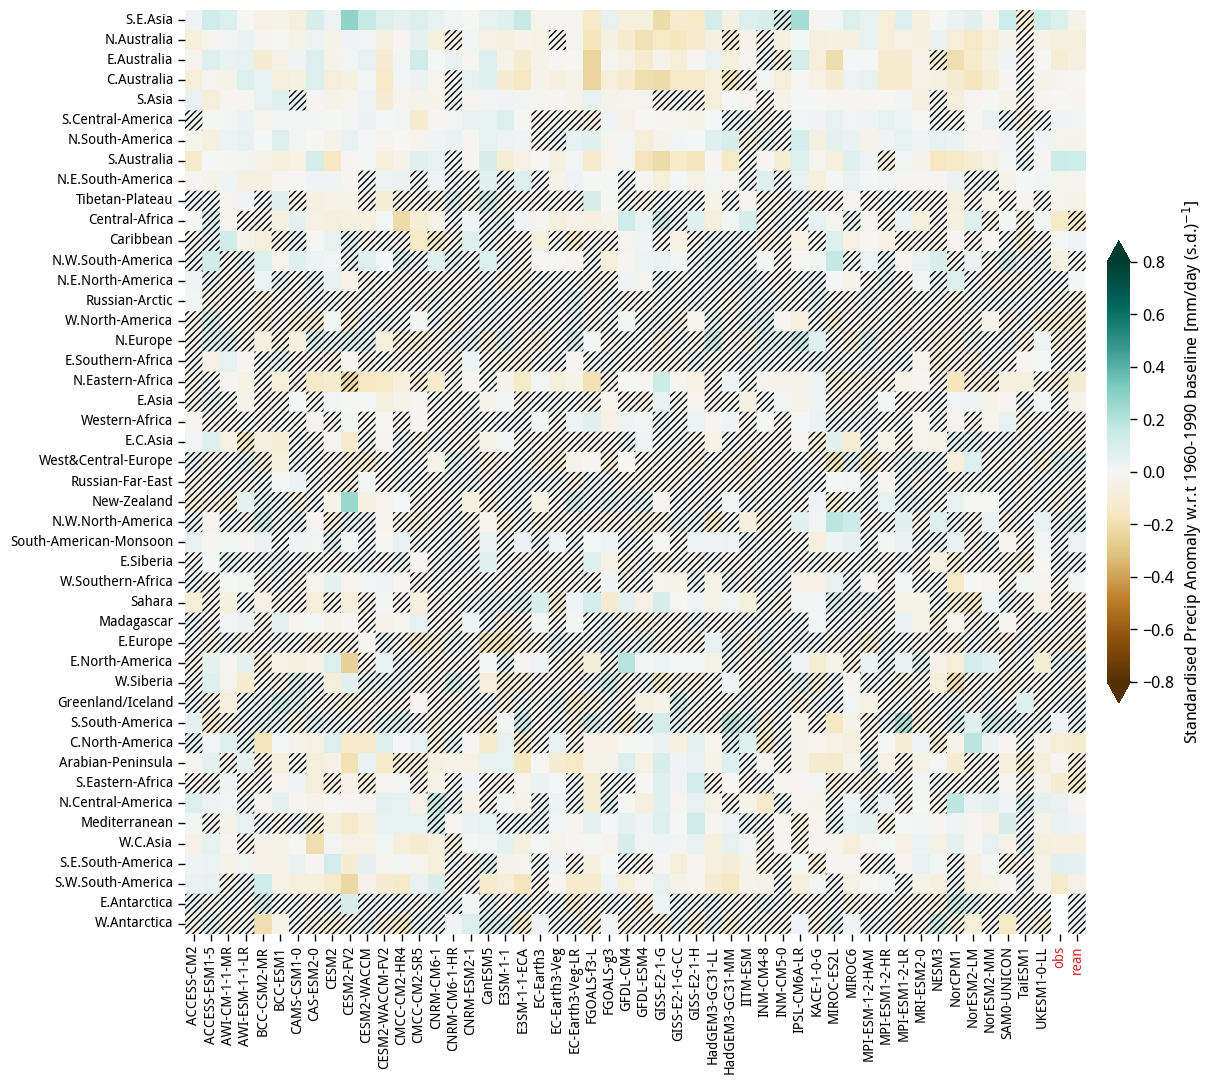

In [42]:
plt.figure(figsize=(14,12))
plot_heatmap(out, vmin=-0.8, vmax=0.8, cmap='BrBG', var='neut', season='SON', ascending=True, cbar_label='Standardised Precip Anomaly w.r.t 1960-1990 baseline [mm/day (s.d.)$^{-1}$]')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().get_xticklabels()[-1].set_color("tab:red")
plt.gca().get_xticklabels()[-2].set_color("tab:red")
plt.ylabel('')
plt.xlabel('')
plt.savefig('./images/model_region/son_neut.png', dpi=300, bbox_inches='tight')

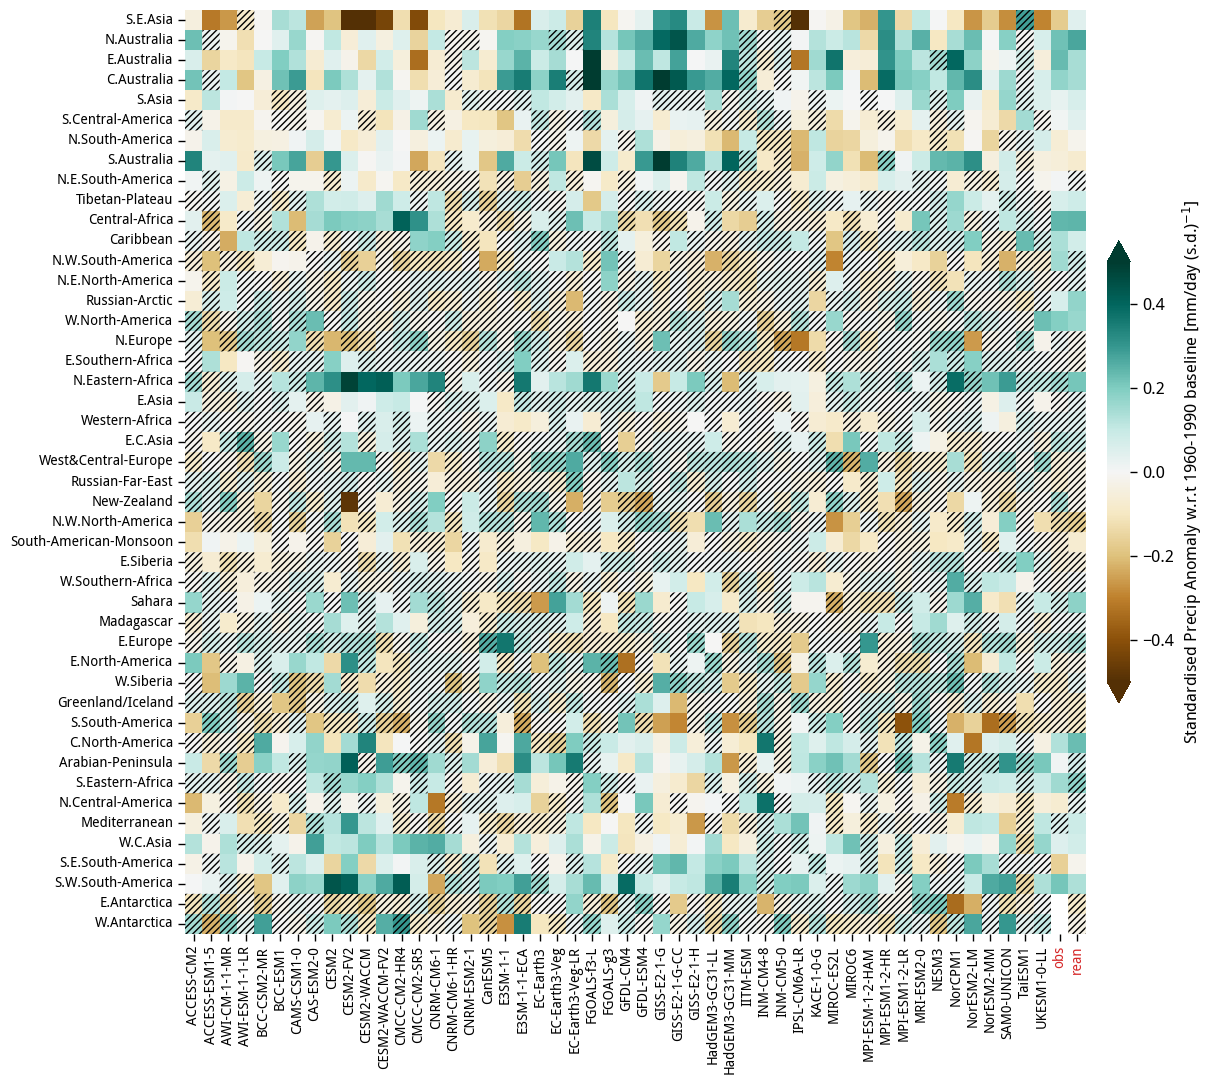

In [43]:
plt.figure(figsize=(14,12))
plot_heatmap(out, vmin=-0.5, vmax=0.5, cmap='BrBG', var='asymm', pval_var='asymm_pval', season='SON', ascending=True, cbar_label='Standardised Precip Anomaly w.r.t 1960-1990 baseline [mm/day (s.d.)$^{-1}$]')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().get_xticklabels()[-1].set_color("tab:red")
plt.gca().get_xticklabels()[-2].set_color("tab:red")
plt.ylabel('')
plt.xlabel('')
plt.savefig('./images/model_region/son_asymm.png', dpi=300, bbox_inches='tight')

In [14]:
nino_models = raw.nino.isel(region = 0).drop('region')

In [15]:
from scipy import stats

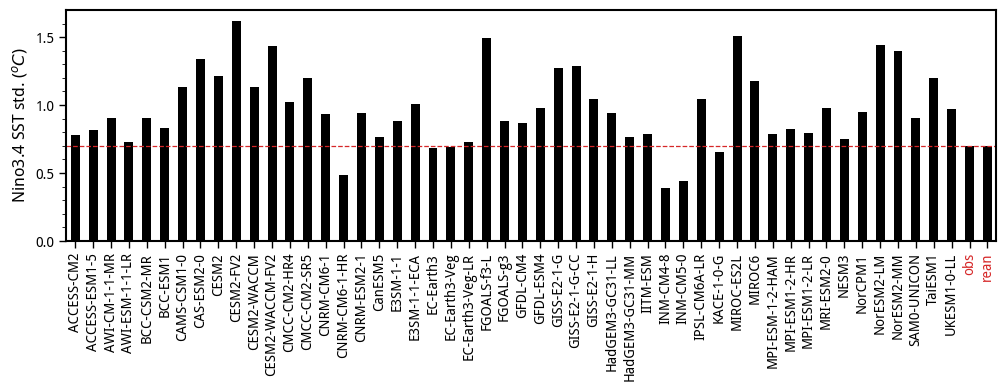

In [16]:
fig = plt.figure(figsize=(12,3))
nino_models.dropna('time').std(dim='time').to_series().plot.bar(color='k')
plt.axhline(nino_models.dropna('time').std(dim='time').sel(model = 'obs'), color='tab:red', ls='--', lw=0.9)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().get_xticklabels()[-1].set_color("tab:red")
plt.gca().get_xticklabels()[-2].set_color("tab:red")
plt.ylabel('Nino3.4 SST std. ($^{o}C$)')
plt.xlabel('')
plt.minorticks_on()
plt.gca().tick_params(which='minor', axis='x', bottom=False)
plt.savefig('./images/regional/supplementary/threshold.png', dpi=300, bbox_inches='tight')

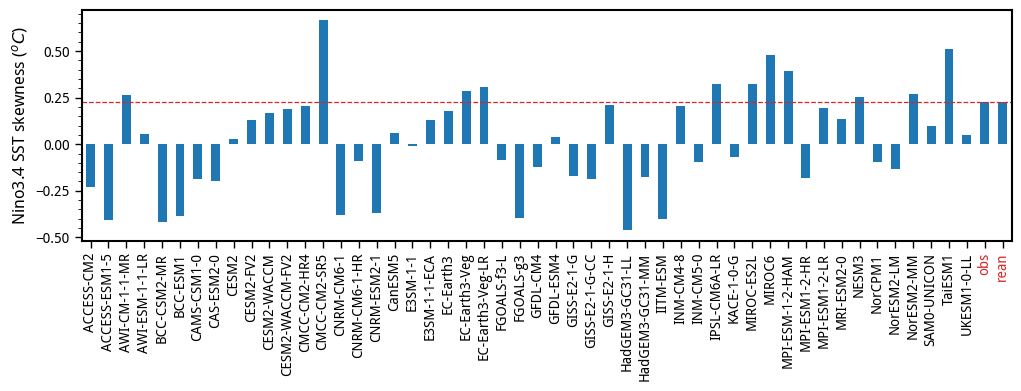

In [17]:
fig = plt.figure(figsize=(12,3))
nino_models.dropna('time').reduce(func=stats.skew, dim='time').to_series().plot.bar()
plt.axhline(nino_models.dropna('time').reduce(func=stats.skew, dim='time').sel(model = 'obs'), color='tab:red', ls='--', lw=0.9)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().get_xticklabels()[-1].set_color("tab:red")
plt.gca().get_xticklabels()[-2].set_color("tab:red")
plt.ylabel('Nino3.4 SST skewness ($^{o}C$)')
plt.xlabel('')
plt.minorticks_on()
plt.gca().tick_params(which='minor', axis='x', bottom=False)
plt.savefig('./images/regional/supplementary/skew.png', dpi=300, bbox_inches='tight')

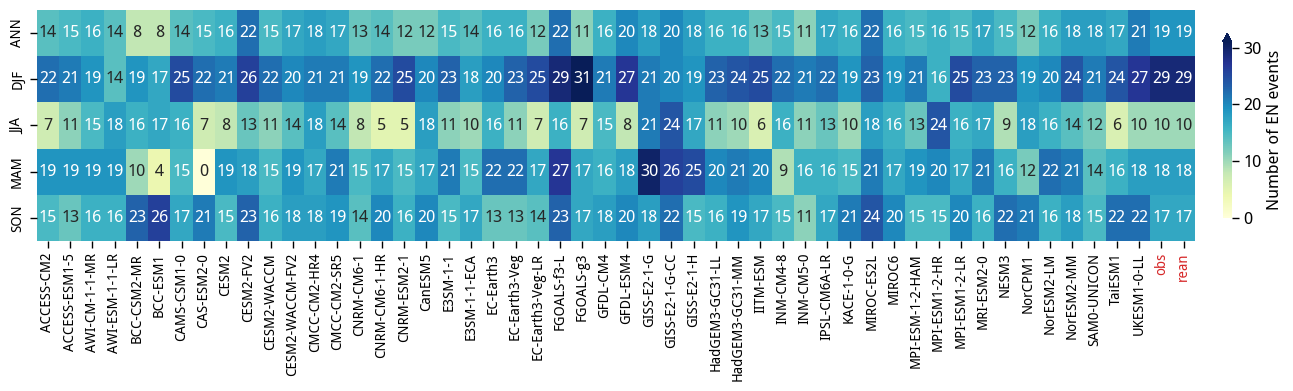

In [62]:
fig = plt.figure(figsize=(18,3))
df = out.en_events.to_dataframe().reset_index().pivot(columns='model', index = 'season', values='en_events')
sns.heatmap(df, cmap='YlGnBu', annot=True, cbar_kws={"shrink": 0.8, "pad": 0.02, "label": 'Number of EN events', "extend":'max'})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().get_xticklabels()[-1].set_color("tab:red")
plt.gca().get_xticklabels()[-2].set_color("tab:red")
plt.ylabel('')
plt.xlabel('')
plt.savefig('./images/regional/supplementary/en_events.png', dpi=300, bbox_inches='tight')

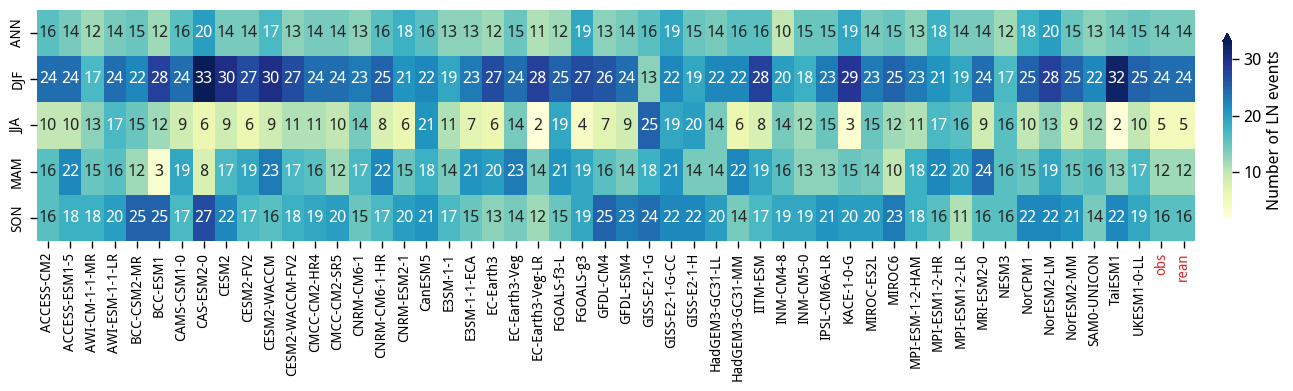

In [63]:
fig = plt.figure(figsize=(18,3))
df = out.ln_events.to_dataframe().reset_index().pivot(columns='model', index = 'season', values='ln_events')
sns.heatmap(df, cmap='YlGnBu', annot=True, cbar_kws={"shrink": 0.8, "pad": 0.02, "label": 'Number of LN events', "extend":'max'})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().get_xticklabels()[-1].set_color("tab:red")
plt.gca().get_xticklabels()[-2].set_color("tab:red")
plt.ylabel('')
plt.xlabel('')
plt.savefig('./images/regional/supplementary/ln_events.png', dpi=300, bbox_inches='tight')

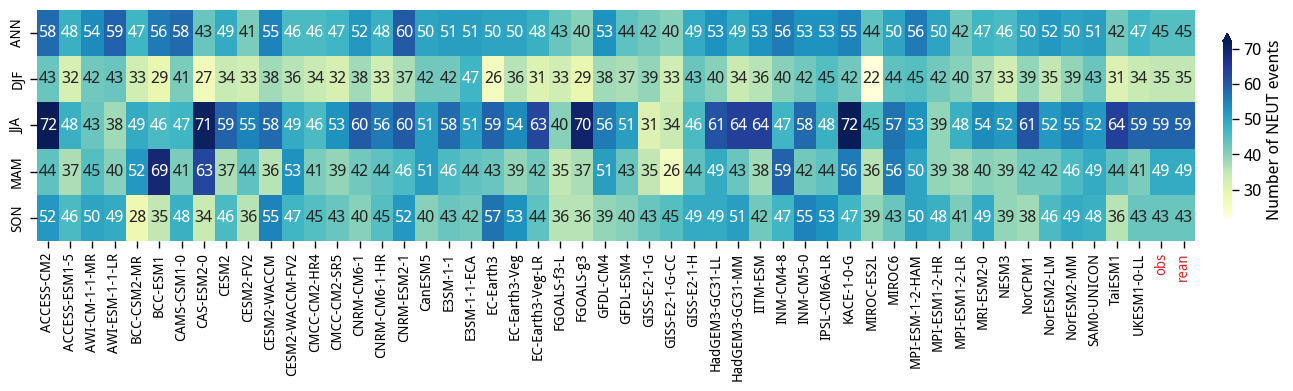

In [64]:
fig = plt.figure(figsize=(18,3))
df = out.neut_events.to_dataframe().reset_index().pivot(columns='model', index = 'season', values='neut_events')
sns.heatmap(df, cmap='YlGnBu', annot=True, cbar_kws={"shrink": 0.8, "pad": 0.02, "label": 'Number of NEUT events', "extend":'max'})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().get_xticklabels()[-1].set_color("tab:red")
plt.gca().get_xticklabels()[-2].set_color("tab:red")
plt.ylabel('')
plt.xlabel('')
plt.savefig('./images/regional/supplementary/neut_events.png', dpi=300, bbox_inches='tight')

In [66]:
model_colors = ['lightcoral', 'indianred', 'tab:brown', 'firebrick', 'maroon', 'red', 'salmon',
                'tab:red', 'sienna', 'chocolate', 'saddlebrown', 'sandybrown', 'darkorange',
                'orange', 'darkgoldenrod', 'goldenrod', 'gold', 'darkkhaki', 'olive', 'yellow',
                'olivedrab', 'tab:green', 'darkolivegreen', 'green', 'limegreen', 'lightseagreen', 'tab:cyan',
                'teal', 'skyblue', 'steelblue', 'tab:blue', 'lightsteelblue', 'royalblue',
                'darkblue', 'blue', 'slateblue', 'mediumpurple', 'indigo', 'darkviolet',
                'plum', 'violet', 'darkmagenta', 'magenta', 'orchid',
                'mediumvioletred', 'deeppink', 'hotpink', 'palevioletred', 'crimson',
                'pink', 'k', 'k']

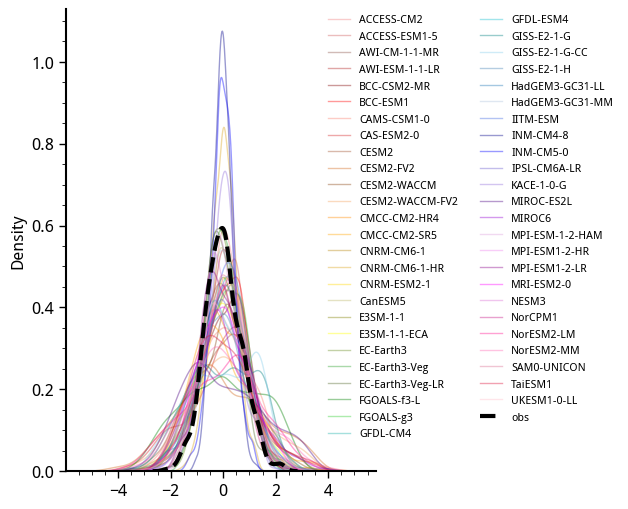

In [100]:
plt.figure(figsize=(4,6))
for i in range(50):
    sns.kdeplot(nino_models.isel(model = i), color=model_colors[i], alpha=0.4, lw=1.0, label = nino_models.model.to_numpy()[i])
sns.kdeplot(nino_models.isel(model = 51), color='k', lw=3.0, ls='--', label='obs')
sns.despine()
# plt.xlim(-8, 5)
plt.legend(frameon=False, ncol=2, fontsize=8, loc='upper right', bbox_to_anchor=[1.8, 1.01])
plt.minorticks_on()
# plt.gca().tick_params(which='minor', axis='x', bottom=False)
plt.savefig('./images/regional/supplementary/nino34_temp_pdf.png', dpi=300, bbox_inches='tight')

### Analysis of model performance over regions

In [76]:
out_ann = out.isel(season = 0).drop('season')
out_djf = out.isel(season = 1).drop('season')
out_mam = out.isel(season = 2).drop('season')
out_jja = out.isel(season = 3).drop('season')
out_son = out.isel(season = 4).drop('season')

In [20]:
import pandas as pd

In [63]:
def find_reg_model_perf(df, pval_df, sort_df, nature=None):
    # 1 -> sign / True
    # 0 -> insign / False
    obs_value = np.empty((46))*np.nan
    obs_nature = np.empty((46))*np.nan
    rean_value_agree = np.empty((46))*np.nan
    rean_nature_agree = np.empty((46))*np.nan
    rean_agree = np.empty((46))*np.nan
    ratio_value_agree = np.empty((46))*np.nan
    ratio_nature_agree = np.empty((46))*np.nan
    ratio_agree = np.empty((46))*np.nan
    if nature != 'asymm':
        pval_df.where(pval_df <= 0.05, 0, inplace=True)
        pval_df.where(pval_df == 0, 1, inplace=True)
    for i in range(len(df.index)):
        if df.index[i] == 'E.Antarctica' or df.index[i] == 'W.Antarctica':
            obs_value[i] = rean_val = df.iloc[i, -1]
            obs_nature[i] = rean_pval = pval_df.iloc[i, -1]
            # checking rean agreement
            rean_agree[i] = np.nan
            rean_value_agree[i] = np.nan
            rean_nature_agree[i] = np.nan
            # checking model agreement
            model_arr = df.iloc[i, :-2]
            model_pval_arr = pval_df.iloc[i, :-2]
            mod_agree = 0
            mod_value_agree = 0
            mod_nature_agree = 0
            for j in range(len(model_arr)):
                mod_val = model_arr.iloc[j]
                mod_pval = model_pval_arr.iloc[j]
                if rean_val*mod_val > 0 and rean_pval == mod_pval:
                    mod_agree += 1
                if rean_val*mod_val > 0:
                    mod_value_agree += 1
                if rean_pval == mod_pval:
                    mod_nature_agree += 1
            ratio_agree[i] = mod_agree/len(model_arr)
            ratio_value_agree[i] = mod_value_agree/len(model_arr)
            ratio_nature_agree[i] = mod_nature_agree/len(model_arr)
        else:
            obs_value[i] = obs_val = df.iloc[i, -2]
            obs_nature[i] = obs_pval = pval_df.iloc[i, -2]
            rean_val = df.iloc[i, -1]
            rean_pval = pval_df.iloc[i, -1]
            # checking rean agreement
            if obs_val*rean_val >= 0 and obs_pval == rean_pval:
                rean_agree[i] = 1
                rean_value_agree[i] = 1
                rean_nature_agree[i] = 1
            elif obs_val*rean_val >= 0:
                rean_agree[i] = 0
                rean_value_agree[i] = 1
                rean_nature_agree[i] = 0
            elif obs_pval == rean_pval:
                rean_agree[i] = 0
                rean_value_agree[i] = 0
                rean_nature_agree[i] = 1
            else:
                rean_agree[i] = 0
                rean_value_agree[i] = 0
                rean_nature_agree[i] = 0
            # checking model agreement
            model_arr = df.iloc[i, :-2]
            model_pval_arr = pval_df.iloc[i, :-2]
            mod_agree = 0
            mod_value_agree = 0
            mod_nature_agree = 0
            for j in range(len(model_arr)):
                mod_val = model_arr.iloc[j]
                mod_pval = model_pval_arr.iloc[j]
                if obs_val*mod_val > 0 and obs_pval == mod_pval:
                    mod_agree += 1
                if obs_val*mod_val > 0:
                    mod_value_agree += 1
                if obs_pval == mod_pval:
                    mod_nature_agree += 1
            ratio_agree[i] = mod_agree/len(model_arr)
            ratio_value_agree[i] = mod_value_agree/len(model_arr)
            ratio_nature_agree[i] = mod_nature_agree/len(model_arr)
    out = pd.DataFrame(dict(obs_value = obs_value, obs_nature = obs_nature, rean_value_agree = rean_value_agree, rean_nature_agree = rean_nature_agree, \
                            rean_agree = rean_agree, mod_value_ratio = ratio_value_agree, mod_nature_ratio = ratio_nature_agree, mod_ratio = ratio_agree))
    out.index = df.index
    return out.reindex(sort_df.index)

In [110]:
# get the sort_df
obs_corr_df = out_son['corr_coef'].to_dataframe().reset_index().pivot(columns='model', index='region', values='corr_coef').sort_values('obs', ascending=True)['obs']

In [111]:
enc_pval_df = out_son.enc_pval.to_dataframe().reset_index().pivot(columns='model', index='region', values='enc_pval')
lnc_pval_df = out_son.lnc_pval.to_dataframe().reset_index().pivot(columns='model', index='region', values='lnc_pval')
asymm_pval_df = out_son.asymm_pval.to_dataframe().reset_index().pivot(columns='model', index='region', values='asymm_pval')

In [112]:
enc_df = out_son.enc.to_dataframe().reset_index().pivot(columns='model', index='region', values='enc')
lnc_df = out_son.lnc.to_dataframe().reset_index().pivot(columns='model', index='region', values='lnc')
asymm_df = out_son.asymm.to_dataframe().reset_index().pivot(columns='model', index='region', values='asymm')

In [113]:
out_enc = find_reg_model_perf(enc_df, enc_pval_df, obs_corr_df)
out_lnc = find_reg_model_perf(lnc_df, lnc_pval_df, obs_corr_df)
out_asymm = find_reg_model_perf(asymm_df, asymm_pval_df, obs_corr_df, nature='asymm')

In [114]:
out_asymm

obs_value  obs_nature  rean_value_agree  \
region                                                            
S.E.Asia                -0.172514         1.0               0.0   
N.Australia              0.219895         1.0               1.0   
E.Australia              0.233857         1.0               1.0   
C.Australia              0.172203         1.0               1.0   
S.Asia                   0.031176         1.0               1.0   
S.Central-America        0.011042         1.0               1.0   
N.South-America         -0.065599         1.0               1.0   
S.Australia             -0.056229         1.0               1.0   
N.E.South-America        0.007509         1.0               1.0   
Tibetan-Plateau          0.062756         1.0               1.0   
Central-Africa           0.239790         1.0               1.0   
Caribbean                0.139842         1.0               1.0   
N.W.South-America        0.152355         1.0               1.0   
N.E.North-America       -0.004376         0.0               0.0   
Russian-Arctic           0.065411         1.0               1.0   
W.North-America          0.194545         1.0               1.0   
N.Europe                 0.025140         0.0               0.0   
E.Southern-Africa       -0.011289         0.0               1.0   
N.Eastern-Africa         0.150879         0.0               1.0   
E.Asia                  -0.012020         0.0               0.0   
Western-Africa           0.028876         0.0               1.0   
E.C.Asia                 0.114075         0.0               1.0   
West&Central-Europe     -0.057456         0.0               1.0   
Russian-Far-East        -0.072601         0.0               1.0   
New-Zealand              0.137000         0.0               0.0   
N.W.North-America       -0.136072         0.0               1.0   
South-American-Monsoon  -0.051322         0.0               1.0   
E.Siberia               -0.057326         0.0               1.0   
W.Southern-Africa       -0.022159         0.0               0.0   
Sahara                   0.075195         0.0               1.0   
Madagascar               0.014331         0.0               1.0   
E.Europe                 0.085175         0.0               1.0   
E.North-America         -0.056114         0.0               1.0   
W.Siberia               -0.085893         0.0               0.0   
Greenland/Iceland       -0.063343         0.0               1.0   
S.South-America         -0.053897         0.0               1.0   
C.North-America          0.131920         1.0               1.0   
Arabian-Peninsula        0.011067         1.0               1.0   
S.Eastern-Africa         0.152852         1.0               1.0   
N.Central-America       -0.073582         1.0               0.0   
Mediterranean            0.058592         0.0               1.0   
W.C.Asia                 0.052859         1.0               1.0   
S.E.South-America       -0.161187         1.0               1.0   
S.W.South-America        0.211125         1.0               1.0   
E.Antarctica            -0.081418         0.0               NaN   
W.Antarctica            -0.031026         0.0               NaN   

                        rean_nature_agree  rean_agree  mod_value_ratio  \
region                                                                   
S.E.Asia                              1.0         0.0             0.70   
N.Australia                           1.0         1.0             0.74   
E.Australia                           1.0         1.0             0.64   
C.Australia                           1.0         1.0             0.78   
S.Asia                                1.0         1.0             0.78   
S.Central-America                     1.0         1.0             0.34   
N.South-America                       1.0         1.0             0.70   
S.Australia                           1.0         1.0             0.32   
N.E.South-America                     0.0         0.0             0

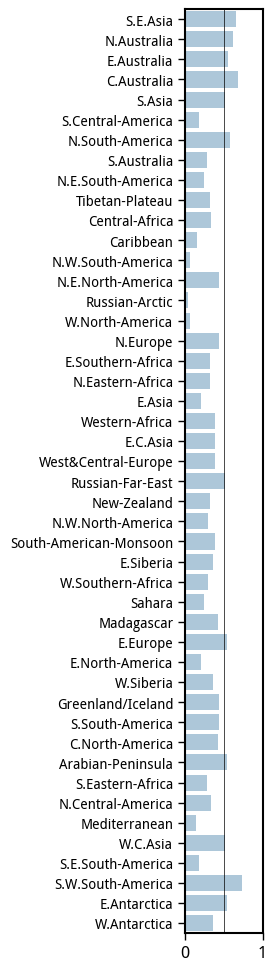

In [115]:
plt.figure(figsize=(1,12))
sns.barplot(out_asymm, y=out_asymm.index, x = out_asymm['mod_ratio'], color='tab:blue', alpha=0.4)
plt.xlabel('')
plt.ylabel('')
plt.xlim(0,1)
plt.yticks(fontsize=10)
plt.axvline(0.5, ls='-', color='k', lw=0.5)
plt.savefig('./images/model_region/son_mod_ratio.png', dpi=300, bbox_inches='tight')

#### analysing and plotting boxplots

In [16]:
def calc_res(precip, nino34, season_str):
    precip_anom = calc_anom(precip)
    threshold = float(nino34.std())
    # nino34 = reorder(nino34).sel(time = sondjf).groupby('time.year').mean('time')[:-1]
    if season_str == 'ANN':
        precip_clim = float(reorder(precip).groupby('time.year').mean('time').mean('year'))
        precip_std = float(reorder(precip).groupby('time.year').mean('time').std('year'))
        precip_det = detrend_separate_check(reorder(precip_anom).groupby('time.year').mean('time'), dim='year').sel(year = slice('1892', '2015'))
        nino34 = reorder(nino34).groupby('time.year').mean('time').sel(year = slice('1892', '2015'))
        en_events = float(nino34.where(nino34 > threshold).count())
        ln_events = float(nino34.where(nino34 < -threshold).count())
        neut_events = float(nino34.where((nino34 < 0.5*threshold) & (nino34 > -0.5*threshold)).count())
        corr = float(get_corr(nino34, precip_det, 'year'))
        pval = float(get_pval(nino34, precip_det, 'year'))
        nino = precip_det.where(nino34 > threshold, drop=True).to_numpy()/precip_std
        nina = precip_det.where(nino34 < -threshold, drop=True).to_numpy()/precip_std
        neut = precip_det.where((nino34 > -0.5*threshold) & (nino34 < 0.5*threshold), drop=True).to_numpy()/precip_std
    else:
        season_names = ['DJF', 'MAM', 'JJA', 'SON']
        season_months = [[12,1,2], [3,4,5], [6,7,8], [9,10,11]]
        season_dict = dict(zip(season_names, season_months))
        season_month = season_dict[season_str]
        season = precip_anom.time.dt.month.isin(season_month)
        precip_clim = float(precip.groupby('time.season').mean('time').sel(season = season_str))
        precip_std = float(precip.groupby('time.season').std('time').sel(season = season_str))
        if season_str == 'DJF':
            precip_det = detrend_separate_check(reorder(precip_anom).sel(time = season).groupby('time.year').mean('time'), dim='year').sel(year = slice('1892', '2015'))
            nino34 = reorder(nino34).sel(time = season).groupby('time.year').mean('time').sel(year = slice('1892', '2015'))
        else:
            precip_det = detrend_separate_check(precip_anom.sel(time = season).groupby('time.year').mean('time'), dim='year').sel(year = slice('1892', '2015'))
            nino34 = nino34.sel(time = season).groupby('time.year').mean('time').sel(year = slice('1892', '2015'))
        en_events = float(nino34.where(nino34 > threshold).count())
        ln_events = float(nino34.where(nino34 < -threshold).count())
        neut_events = float(nino34.where((nino34 < 0.5*threshold) & (nino34 > -0.5*threshold)).count())
        corr = float(get_corr(nino34, precip_det, 'year'))
        pval = float(get_pval(nino34, precip_det, 'year'))
        nino = precip_det.where(nino34 > threshold, drop=True).to_numpy()/precip_std
        nina = precip_det.where(nino34 < -threshold, drop=True).to_numpy()/precip_std
        neut = precip_det.where((nino34 > -0.5*threshold) & (nino34 < 0.5*threshold), drop=True).to_numpy()/precip_std
    return dict(
        precip_clim = precip_clim,
        precip_std = precip_std,
        # precip_skw = precip_skw,
        corr = corr,
        pval = pval,
        nino = nino,
        nina = nina,
        neut = neut,
        threshold = threshold,
        en_events = en_events,
        ln_events = ln_events,
        neut_events  = neut_events
    )

In [17]:
import climtas
from scipy import stats
# import seaborn as sns
import pandas as pd
from dateutil.relativedelta import relativedelta
import regionmask

def find_indices(nino_events, nina_events):
    nino_idx = []
    nina_idx = []
    for i in range(len(nino_events)):
        start_en = nino_events['time'].to_numpy()[i]
        end_en = nino_events['event_duration'].to_numpy()[i]
        for j in range(end_en):
            nino_idx.append(start_en+j)
    for i in range(len(nina_events)):
        start_ln = nina_events['time'].to_numpy()[i]
        end_ln = nina_events['event_duration'].to_numpy()[i]
        for j in range(end_ln):
            nina_idx.append(start_ln+j)
    return nino_idx, nina_idx

###

def get_event_indices(nino_anom, threshold, min_duration, rolling_period):
    # import climtas
    nino_events = climtas.event.find_events(nino_anom.rolling(time=rolling_period).mean('time') > threshold, min_duration=min_duration)
    nina_events = climtas.event.find_events(nino_anom.rolling(time=rolling_period).mean('time') < -threshold, min_duration=min_duration)
    nino_idx, nina_idx = find_indices(nino_events, nina_events)
    enso_idx = np.sort(np.concatenate((nino_idx, nina_idx)))
    total = np.arange(0, len(nino_anom))
    neut_idx = np.delete(total, enso_idx)
    return nino_idx, nina_idx, neut_idx

###

# functions to calculate correlation value
def get_corr_1d(x, y):
    statistic, _ = stats.spearmanr(x, y)
    return statistic


def get_pval_1d(x, y):
    _, pval = stats.spearmanr(x, y)
    return pval


def get_corr(x, y, dim):
    return xr.apply_ufunc(get_corr_1d, x, y, input_core_dims=[[dim], [dim]], vectorize=True, dask = 'parallelized')


def get_pval(x, y, dim):
    return xr.apply_ufunc(get_pval_1d, x, y, input_core_dims=[[dim], [dim]], vectorize=True, dask = 'parallelized')

####

def reorder(da):
    da['time'] = pd.date_range('1891-01-01', '2015-01-01', freq='1M')

    custom = da.sel(time=da.time.dt.month.isin([6,7,8,9,10,11,12,1,2,3,4,5]))
    # convert cftime to datetime
    datetimeindex = custom.indexes['time']#.to_datetimeindex() 
    # custom['time'] = pd.to_datetime(datetimeindex)
    
    # Add custom group by year functionality
    custom_year = custom['time'].dt.year
    
    # convert time type to pd.Timestamp
    time1 = [pd.Timestamp(i) for i in custom_year['time'].values] 
    # time1 = [pd.Timestamp(i) for i in custom_year['time'].values] 
    
    # Add year to Timestamp objects when month is before Jan. (relativedelta does not work from np.datetime64)
    time2 = [i + relativedelta(years=1) if i.month>=6 else i for i in time1] 
    custom['time'] = time2
    return custom

####


def calc_anom(
    input_da,
    base_start_date: str = "1960-01-01",
    base_end_date: str = "1990-01-01",
    start_year: str = "1891-01-01",
    end_year: str = "2015-01-01",
    # var = "Temperature",
    # units = 'K'
):

    # define the base climatology
    base_clim = input_da.sel(time=slice(base_start_date, base_end_date))

    # calculate the monthly climatology for the base years
#     da_clim_coarsen = base_clim.coarsen(time=12)
    da_clim = base_clim.groupby("time.month").mean("time")
    da_anom = input_da.sel(time = slice(start_year, end_year)).groupby("time.month") - da_clim
    
    return da_anom

####

In [18]:
# Function to preprocess the regridded data


import xarray as xr
from statsmodels.tsa.seasonal import STL
import pymannkendall as mk

def detrend1d(arr, period = 9*12):
    res = STL(arr, period = period).fit()
    arr_det = arr - res.trend
    return arr_det
    
def detrend1d_check(arr, period = 9):
    res = STL(arr, period = period).fit()
    arr_det = arr - res.trend
    return arr_det

# def detrend_separate(da, period=9):
#     trend = da.rolling(time = period*12).mean('time')
#     da_detrend = da - trend
#     return da_detrend
def detrend_separate(da, dim):
    return xr.apply_ufunc(detrend1d, da, input_core_dims=[[dim]], output_core_dims=[[dim]])
    
def detrend_separate_check(da, dim):
    return xr.apply_ufunc(detrend1d_check, da, input_core_dims=[[dim]], output_core_dims=[[dim]])

In [19]:
raw['region'] = out['region']

In [34]:
raw.isel(region=5)

<xarray.Dataset>
Dimensions:  (time: 1488, model: 32)
Coordinates:
  * time     (time) datetime64[ns] 1891-01-16T12:00:00 ... 2014-12-16T12:00:00
    region   <U15 'E.North-America'
  * model    (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'obs' 'rean'
Data variables:
    precip   (time, model) float64 ...
    nino     (time, model) float64 ...

[Text(1, 0, 'LN'), Text(2, 0, 'NEUT'), Text(3, 0, 'EN')]

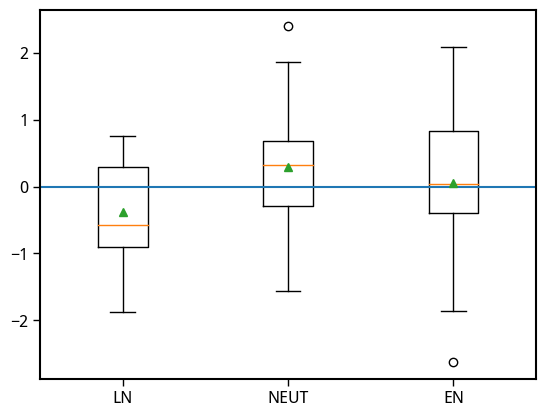

In [35]:
reg = raw.isel(region = 5, model=-2)
res = calc_res(reg.precip, reg.nino, season_str = 'ANN')
plt.boxplot([res['nina'], res['neut'], res['nino']], showmeans=True, )
plt.axhline(0.0)
plt.gca().set_xticklabels(['LN', 'NEUT', 'EN'])

In [36]:
res

{'precip_clim': 88.09927729041507,
 'precip_std': 6.153609431671976,
 'corr': 0.058284815106215575,
 'pval': 0.5202202168132003,
 'nino': array([ 0.7316114 ,  1.16050612, -0.19626864,  0.92843122, -0.59441202,
        -2.62878497, -1.860302  ,  0.59933402,  0.99315198,  0.71634631,
        -0.00594931,  2.08231947,  1.88825038, -1.36921395, -1.52578031,
        -0.07306952,  0.03294159, -0.08465779,  0.24544122]),
 'nina': array([-0.57529206, -0.78735413,  0.2213697 , -1.68731916, -1.87925527,
         0.63073856, -0.71174948,  0.76132884,  0.35679329, -1.02685558,
        -0.05482801, -0.67390683, -1.11445531,  0.17407971,  0.72545801]),
 'neut': array([-1.55599768, -0.74844659,  0.69059206,  0.67303338,  1.50145172,
         1.09221435,  0.9049495 , -1.01204859, -0.30935365,  0.52638674,
        -0.24448216,  1.130796  ,  0.61737919,  2.39337505, -0.53032824,
         0.08528262,  1.86520809,  0.10689536,  0.32235038,  0.46667193,
         0.54610933, -0.70891138,  0.30103138,  0.070

In [40]:
stats.mannwhitneyu(res['neut'], res['nino']).pvalue

0.6812919809547852

In [39]:
out.isel(region=5, model=-2, season=0).lnc_pval.values

array(0.02046921)

In [33]:
out

<xarray.Dataset>
Dimensions:      (model: 32, region: 46, season: 5)
Coordinates:
  * model        (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'obs' 'rean'
  * region       (region) object 'Greenland/Iceland' ... 'W.Antarctica'
  * season       (season) object 'ANN' 'DJF' 'MAM' 'JJA' 'SON'
Data variables: (12/16)
    std_dev      (model, region, season) float64 ...
    clim         (model, region, season) float64 ...
    corr_coef    (model, region, season) float64 ...
    pval         (model, region, season) float64 ...
    nino         (model, region, season) float64 ...
    nina         (model, region, season) float64 ...
    ...           ...
    ln_events    (model, season) float64 ...
    neut_events  (model, season) float64 ...
    threshold    (model) float64 ...
    enc          (model, region, season) float64 0.4618 0.06427 ... 0.03908
    lnc          (model, region, season) float64 -0.297 -0.1173 ... -0.08558
    asymm        (model, region, season) float64 0.08238 -0.02653 ... -0.02325